<a href="https://colab.research.google.com/github/FNSY96/Eventum-Junior-Data-Scientist-Task/blob/master/Eventum_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVENTUM TASK

## Imports

In [1]:
!pip3 install pandas
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
import csv
import glob
import os
import io

In [0]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

In [0]:
import csv
import glob
import os
import io
import pandas as pd
import numpy as np

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import statistics
from dateutil import parser

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


In [8]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

drive.mount("/content/drive", force_remount = True)
datadir  = 'drive/My Drive/Colab Notebooks/airbnb'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Funcitons

In [0]:
def adjust_age(dataframe):
  temp = dataframe['age'] > 1000
  dataframe.loc[temp, 'age'] = 2015 - dataframe.loc[temp, 'age']

In [0]:
def replace_nan(dataframe):
  dataframe.gender.replace('-unknown-',np.nan, inplace=True)
  dataframe.age.replace('NaN', np.nan, inplace=True)
  dataframe['age'].fillna(0, inplace=True)
  dataframe['gender'].fillna('FEMALE', inplace=True)
  dataframe['first_affiliate_tracked'].fillna((train_final['first_affiliate_tracked'].mode()[0]), inplace=True)
  return dataframe

In [0]:
def split_timestamp(original, encoded):
  year_timestamp = list()
  month_timestamp = list()
  timestamp_col = encoded.timestamp_first_active
  
  for i in range(original.shape[0]):
    year_timestamp.append(int(str(timestamp_col[i])[:4]))
    month_timestamp.append(int(str(timestamp_col[i])[4:6]))
    
  year_timestamp = pd.DataFrame({'col':year_timestamp})
  year_timestamp.columns = ['year_timestamp']
  
  month_timestamp = pd.DataFrame({'col':month_timestamp})
  month_timestamp.columns = ['month_timestamp']
  
  encoded = encoded.drop(['timestamp_first_active'], axis=1)
  encoded = pd.concat([encoded, year_timestamp, month_timestamp], axis = 1)
  return encoded

In [0]:
def download_results(pred, filename):
  pred = pd.DataFrame(pred)
  res = pd.concat([test_ids, pred], axis=1)
  res.columns = ['id', 'country']
  res.to_csv(filename,index=False)
  files.download(filename)

In [0]:
def convert_categorical(dataframe, string_attributes):
  label_encoder = preprocessing.LabelEncoder()
  
  for i in range(len(string_attributes)):
    attribute_name = string_attributes[i]
    attribute_list = dataframe[attribute_name]
    attribute_encoded = label_encoder.fit_transform(attribute_list)
    
    value_zipped_encoded_list = list(zip(attribute_list,attribute_encoded))
    value_zipped_encoded_df = pd.DataFrame(value_zipped_encoded_list)
    modified_attribute_name = attribute_name + '_converted'
    value_zipped_encoded_df.columns = [attribute_name, modified_attribute_name]
    zipped_df = pd.DataFrame(value_zipped_encoded_df)
   
    dataframe.reset_index(drop=True, inplace=True)
    zipped_df.reset_index(drop=True, inplace=True)
    dataframe = pd.concat([dataframe, zipped_df], axis = 1)

  return dataframe.drop(string_attributes, axis=1)


In [0]:
def split_date_account_created(original, encoded):
  year_account_created = list()
  month_account_created = list()
  for i in range(original.shape[0]):
    year_account_created.append(parser.parse(original['date_account_created'][i]).year)
    month_account_created.append(parser.parse(original['date_account_created'][i]).month)
    
  year_account_created = pd.DataFrame({'col':year_account_created})
  year_account_created.columns = ['year_account_created']
  
  month_account_created = pd.DataFrame({'col':month_account_created})
  month_account_created.columns = ['month_account_created']
  
  encoded = encoded.drop(['date_account_created'], axis=1)
  encoded = pd.concat([encoded, year_account_created, month_account_created], axis = 1)
  return encoded

## Dataframes

In [0]:
train = pd.read_csv(os.path.join(datadir, 'train_users_2.csv'), encoding = 'latin-1')
test = pd.read_csv(os.path.join(datadir, 'test_users.csv'), encoding = 'latin-1')
countries = pd.read_csv(os.path.join(datadir, 'countries.csv'), encoding = 'latin-1')
age_gender = pd.read_csv(os.path.join(datadir, 'age_gender_bkts.csv'), encoding = 'latin-1')
sessions = pd.read_csv(os.path.join(datadir, 'sessions.csv'), encoding = 'latin-1')

In [0]:
adjust_age(train)
adjust_age(test)

In [0]:
booked_users = train.dropna(subset=['date_first_booking'])

In [0]:
year_account_created = list()
for i in range(train.shape[0]):
  year_account_created.append(parser.parse(train['date_account_created'][i]).year)
year_account_created = pd.DataFrame({'col':year_account_created})
year_account_created.columns = ['date_account_created']
year_account_created = year_account_created.sort_values(by='date_account_created', ascending=True)

In [19]:
print(sessions.columns)

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')


## Charts and Plots

### [Histogram] of Users' Ages

Text(0, 0.5, 'count')

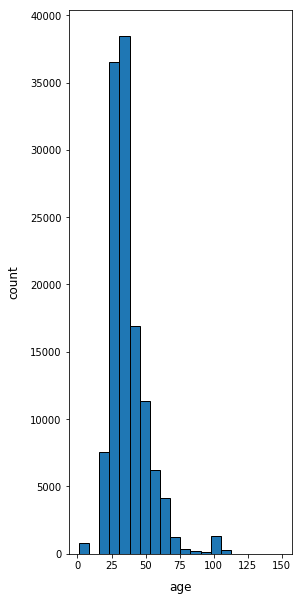

In [66]:
att = 'age'
ax = train[att].hist(bins=20, grid=False,edgecolor='black', figsize=(4,10))
ax.set_xlabel(att, labelpad=10, size=12)
ax.set_ylabel("count", labelpad=10, size=12)

### [Bar Plot] of Users' Genders

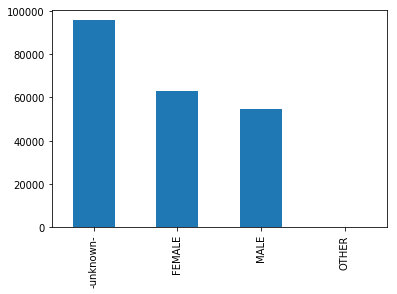

In [27]:
att = 'gender'
ax = train[att].value_counts().plot.bar()

### [Bar Plot] of Languages Spoken by the Users
We can notice that users speaking English form the vast majority, this is logical since this data is for USA users.

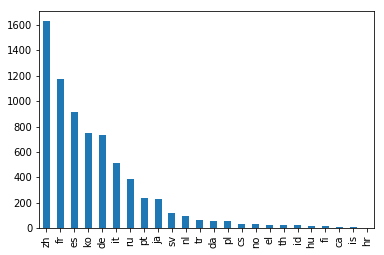

In [28]:
att = 'language'
ax = train[train[att] != 'en'][att].value_counts().plot.bar()

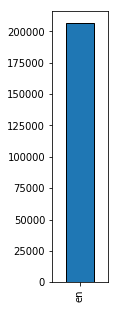

In [29]:
att = 'language'
ax = train[train[att] == 'en'][att].value_counts().plot.bar(edgecolor='black', figsize=(1,5))
# ax = train[att].value_counts().plot.bar()

### [Box Plot] for the Users' Ages
This box plot shows that the median of the ages is 34 years, which is a good age for travelling.

Text(1, 34.0, '34.0')

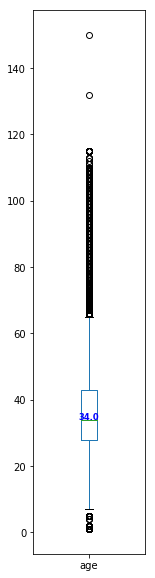

In [63]:
df = train['age']
ax = df.plot(kind='box', figsize=(2,10))
ax.text(1, df.median(), df.median(), horizontalalignment='center', size='small', color='b', weight='bold')

### [Bar Plot] for the Destination Country Selected by Users
We can notice that most of the users have registerd but did not go anywhere as the NDF is the max by about 120000 of ~ 215,000 tuples.
In case we have a bar plot for the users who booked a at least 1 booking, we can notice that most bookings are internal (i.e. inside the US) while the 2nd highest percentage will go to the "OTHER" label, this gives a good intituion about the predictions in the 2nd part.

Text(0, 0.5, 'count')

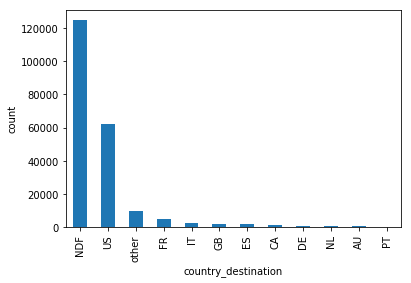

In [31]:
train['country_destination'].value_counts().plot(kind='bar')
plt.xlabel('country_destination')
plt.ylabel('count')

Text(0, 0.5, 'count')

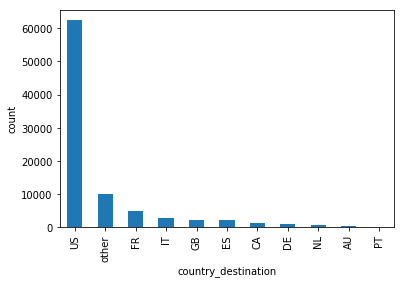

In [32]:
booked_users['country_destination'].value_counts().plot(kind='bar')
plt.xlabel('country_destination')
plt.ylabel('count')

### [Bar Plot] for the Device Type of Users
We can notice that the majority of the users use desktop to access Airbnb site, more over we can notice the dominance of Apple devices (Mac, iPhone and iPad).
Simillar insights can be noticed about the devices used by the users who booked on Airbnb. The dominance of Apple devices though they are known for their high price, gives a good insight about the financial states of the real travelers and Airbnb users.

Text(0, 0.5, 'count')

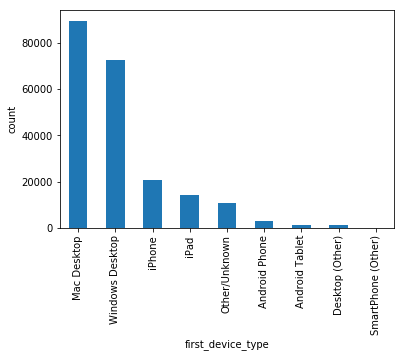

In [33]:
train['first_device_type'].value_counts().plot(kind='bar')
plt.xlabel('first_device_type')
plt.ylabel('count')

Text(0, 0.5, 'count')

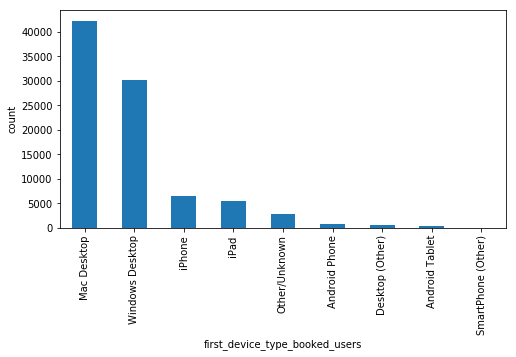

In [53]:
plt.figure(figsize=(8,4))
booked_users['first_device_type'].value_counts().plot(kind='bar')
plt.xlabel('first_device_type_booked_users')
plt.ylabel('count')

### [Bar Plot] for the browser/signup app
Since in the previous barplot we noticed the dominance of desktop devices among users, it is logical to find the web is dominant also here with a large percentage (over 70,000 from ~215,000).
From this we can concluded the need to maintain and continously update the desktop website of Airbnb which is more used by the users.

Text(0, 0.5, 'count')

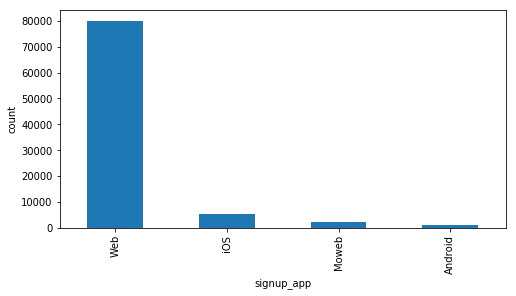

In [54]:
plt.figure(figsize=(8,4))
booked_users['signup_app'].value_counts().plot(kind='bar')
plt.xlabel('signup_app')
plt.ylabel('count')

### [Bar Plot] for the First Browser for Users
We can notice also the dominance of desktop browsers which also makes sense and follows the previous analysis.

Text(0, 0.5, 'count')

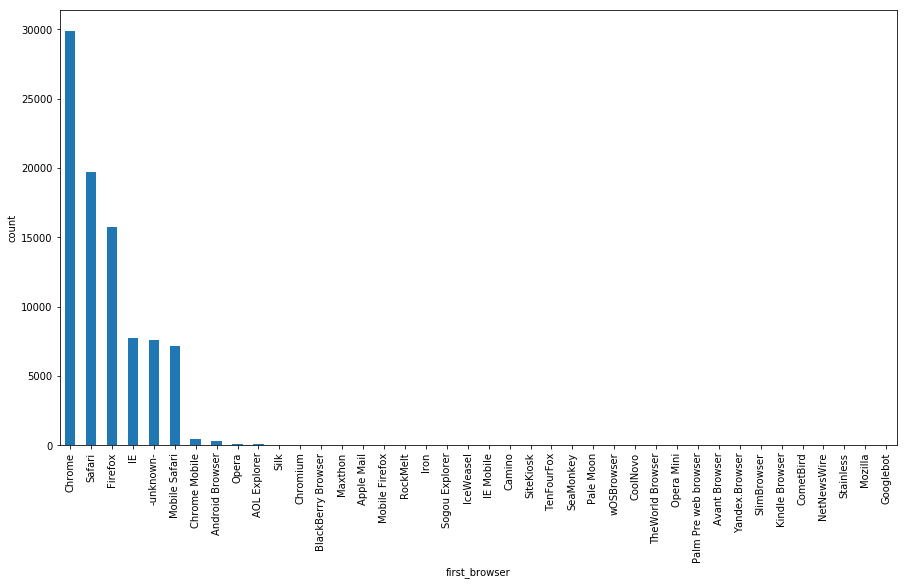

In [58]:
plt.figure(figsize=(15,8))
booked_users['first_browser'].value_counts().plot(kind='bar')
plt.xlabel('first_browser')
plt.ylabel('count')


### [Bar Plot] for the Signup Method used by the Users
It is noticed that more than half the users prefered to use the basic signup method (i.e. using email and password registeration) followed by Facebook. It is quite strange that almost no users used Google for signup!
This maybe because the Google authentication system that may be more complicated on a simple user!

Text(0, 0.5, 'count')

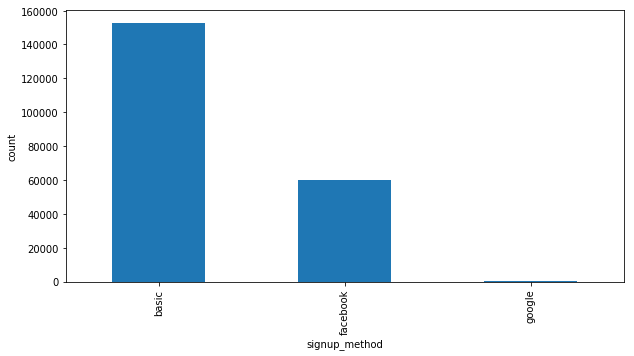

In [37]:
plt.figure(figsize=(10,5))
att = 'signup_method'
train[att].value_counts().plot(kind='bar')
plt.xlabel(att)
plt.ylabel('count')

### [Box Plot] for the Age of Users selecting the Desitination Countries
We can easily notice that there is no large difference in the users' ages that are visiting each country.

Text(0, 0.5, 'age')

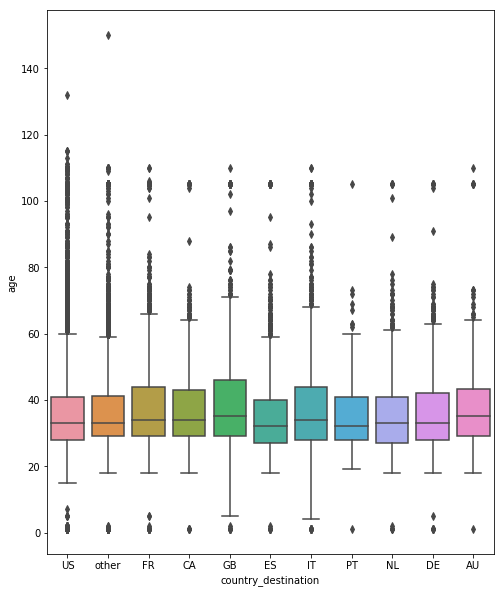

In [60]:
plt.figure(figsize=(8,10))
sns.boxplot(y='age' , x='country_destination',data=booked_users)
plt.xlabel('country_destination')
plt.ylabel('age')

### [Bar Plot] for the Number of New Users that Register on Airbnb each Year
We can notice the exponential increase of users from year to year (although there is a slight decrease in year 2014). This gives a good insight about the development of Airbnb platform and the evolution of marketing and advertising.
The drop at year 2014 is not a big drop but it must be taken into concideration.

Text(0, 0.5, 'count')

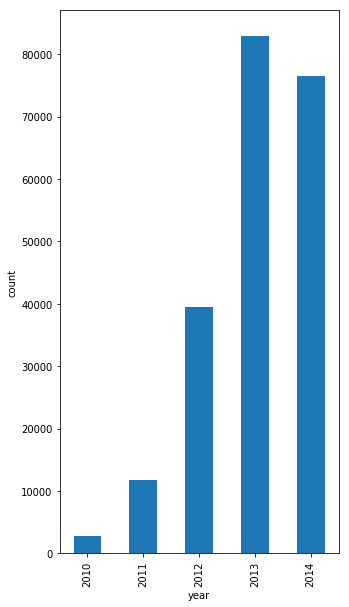

In [62]:
plt.figure(figsize=(5,10))
year_account_created['date_account_created'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('count')

## Data Cleaning and Feature Selection

In [0]:
labels_train = train['country_destination'].values
train_final = train.drop(['id', 'country_destination', 'date_first_booking'], axis=1)
test_final = test.drop(['id', 'date_first_booking'], axis=1)
test_ids = test['id'].to_frame()

In [0]:
train_final = replace_nan(train_final)
test_final = replace_nan(test_final)
string_attributes = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 
                     'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
train_encoded = convert_categorical(train_final, string_attributes)
test_encoded = convert_categorical(test_final, string_attributes)

train_encoded = split_date_account_created(train, train_encoded)
test_encoded = split_date_account_created(test, test_encoded)

train_encoded_split_ts = split_timestamp(train, train_encoded)
test_encoded_split_ts = split_timestamp(test, test_encoded)

## Training Classifiers

### kNN

In [0]:
scaler = StandardScaler() 
data_train = scaler.fit_transform(train_encoded_split_ts)
data_test = scaler.fit_transform(test_encoded_split_ts)  
knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(data_train, labels_train)
knn_pred = knn.predict(data_test)

In [0]:
download_results(knn_pred, 'knn_results.csv')

### Decision Tree

In [0]:
clf=tree.DecisionTreeClassifier()
clf.fit(train_encoded_split_ts, labels_train)
dt_pred=clf.predict(test_encoded_split_ts)
download_results(dt_pred, 'decision_tree_results.csv')

### ٍRandom Forest

In [0]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(train_encoded_split_ts, labels_train)
rf_pred=clf.predict(test_encoded_split_ts)
download_results(rf_pred, 'random_forest_results.csv')

### Naive Bayes

In [0]:
# DON'T STANDARDIZE -> LOWER SCORES
clf = GaussianNB()
clf.fit(train_encoded, labels_train)
nb_pred = clf.predict(test_encoded)
download_results(nb_pred, 'nb_results.csv')

### Logistic Regression

In [0]:
clf = LogisticRegression()
clf.fit(train_encoded_split_ts, labels_train)
lr_pred = clf.predict(test_encoded_split_ts)
download_results(lr_pred, 'lr_results.csv')

### Adaboost

In [0]:
clf = AdaBoostClassifier()
clf.fit(train_encoded, labels_train)
ada_pred = clf.predict(test_encoded)
download_results(ada_pred, 'ada_results.csv')

### Bagging Classifier

In [0]:
clf = BaggingClassifier()
clf.fit(train_encoded_split_ts, labels_train)
bagging_pred = clf.predict(test_encoded_split_ts)
download_results(bagging_pred, 'bagging_results.csv')